In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv")
df.head()
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
df=df.drop(['PassengerId','Name','SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [71]:
target=df.Survived
target



0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [72]:
df=df.drop(['Survived'],axis=1)
df.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [73]:
df.Age.isnull().sum()


177

In [74]:
mean_age=df.Age.mean()
df.Age.fillna(int(mean_age), inplace=True)
df.Age.isnull().sum()


0

In [77]:
from sklearn.preprocessing import LabelEncoder
sex = LabelEncoder()
df['Sex']=sex.fit_transform(df['Sex'])
df

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,29.0,23.4500
889,1,1,26.0,30.0000


In [79]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(df,target)

DecisionTreeClassifier()

In [80]:
model.score(df,target)

0.9741863075196409

In [82]:
model.predict([[1,1,26,30]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

<BarContainer object of 891 artists>

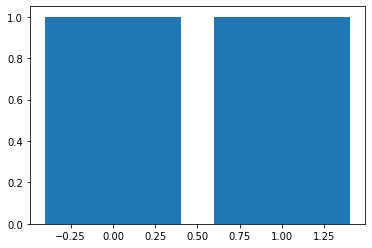

In [87]:
plt.bar(df.Sex,target)

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target, test_size=0.2)
model.fit(X_train, y_train)

LogisticRegression()

In [89]:
model.score(df,target)
#poor efficiency


0.7968574635241302